In [1]:
from sklearn import datasets, linear_model, metrics, preprocessing
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np
import scipy
import time

In [2]:
#ustawienia
time_multiplicator = 100
seed = 244810
samples = 2410

In [3]:
XY,Y  = datasets.make_classification(n_features=2,n_informative=2 ,n_clusters_per_class=1,n_redundant=0,n_samples=samples, random_state=seed )

In [4]:
from sklearn.model_selection import train_test_split
XY_train, XY_test, Y_train, Y_test = train_test_split(XY, Y, test_size=0.2, random_state=seed)

x_train,y_train= XY_train.T
x_test,y_test= XY_test.T

In [5]:
def norm(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

x_train = norm(x_train)
#y_train = norm(y_train)
x_test = norm(x_test)
#y_test = norm(y_test)

In [6]:
xy_train = np.column_stack((x_train.T,y_train.T))


In [7]:
#moja metoda
def my_ridge(alpha, ridge_x, ridge_y):
    return np.linalg.pinv(ridge_x.T @ ridge_x+ alpha * np.identity(len(ridge_x.T))) @ ridge_x.T@ridge_y

In [8]:
#moja metoda
pre_2 = PolynomialFeatures(1)
X_poly_2 = pre_2.fit_transform(x_train.reshape(-1, 1))

my_ridge_ans = my_ridge(2e-6, X_poly_2, y_train)
my_ridge_ans

array([ 0.41733688, -0.82478453])

In [9]:
#sklearn
sk_ridge_ans= linear_model.RidgeClassifier(alpha=2e-16).fit(xy_train,Y_train)
sk_ridge_ans.coef_

array([[-0.49781495, -0.64748033]])

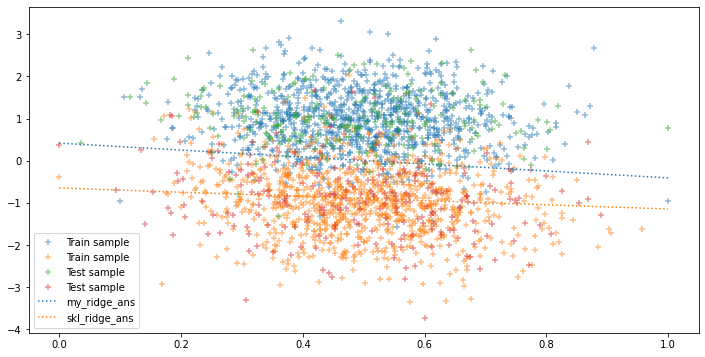

In [10]:
plt.figure(figsize=(12,6))
for class_value in range(2):
    row_ix = np.where(Y_train == class_value)
    plt.scatter(x_train[row_ix], y_train[row_ix], marker="+", alpha=0.5, label="Train sample")
    
for class_value in range(2):
    row_ix = np.where(Y_test == class_value)
    plt.scatter(x_test[row_ix], y_test[row_ix], marker="+", alpha=0.5, label="Test sample")
    
lin = np.linspace(min(x_train),max(x_train),100)

p = np.poly1d(my_ridge_ans[::-1])


plt.plot(lin, p(lin), label="my_ridge_ans", linestyle=":" )

a =sk_ridge_ans.coef_.squeeze()
q = np.poly1d(a)
plt.plot(lin, q(lin), label="skl_ridge_ans", linestyle=":" )


plt.legend()
plt.show()

In [11]:
#sk_ridge_ans.score(XY_test, Y_test)

In [12]:
sk_pred = sk_ridge_ans.predict(XY_test)
metrics.accuracy_score(sk_pred, Y_test)

0.8319502074688797

In [13]:
my_ridge_class= []
p = np.poly1d(my_ridge_ans[::-1])

for co in XY_test:
    if co[1] > p(co[0]):
        my_ridge_class.append(0)
    else:
        my_ridge_class.append(1)


In [14]:
metrics.accuracy_score(my_ridge_class, Y_test)

0.8236514522821576

In [15]:
print("Moja implementacja BAS:    ",metrics.balanced_accuracy_score(my_ridge_class, Y_test))
print("Implementacja sklearn BAS: ",metrics.balanced_accuracy_score(sk_pred, Y_test))

Moja implementacja BAS:     0.8538447111777945
Implementacja sklearn BAS:  0.8591986036838978


In [16]:
metrics.confusion_matrix(Y_test,my_ridge_class)

array([[232,   7],
       [ 78, 165]], dtype=int64)

In [17]:
metrics.confusion_matrix(Y_test,sk_pred)

array([[232,   7],
       [ 74, 169]], dtype=int64)

macierz pomyłek
specyficzność 
czułość
roc